In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [143]:
# Loading json files
df_accounts = pd.read_json("datasets/accounts_anonymized.json")
df_support_cases = pd.read_json("datasets/support_cases_anonymized.json")

# Saving files in csv 
df_accounts.to_csv("datasets/accounts_anonymized.csv", index=False)
df_support_cases.to_csv("datasets/support_cases_anonymized.csv", index=False)

## Start to analyze df_accounts

In [144]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_sfid          1415 non-null   object
 1   account_name          1415 non-null   object
 2   account_created_date  1415 non-null   object
 3   account_country       1408 non-null   object
 4   account_industry      1402 non-null   object
dtypes: object(5)
memory usage: 55.4+ KB


In [145]:
df_accounts.head()

,account_sfid,account_name,account_created_date,account_country,account_industry
0,28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6...,Customer_b9c711e0,2017-12-18 15:53:15,Pakistan,Printing
1,17779701277914218bcfcd9211c3fb6673758ca2f6e014...,Customer_b3e69ecd,2010-01-11 17:41:46,United Kingdom,Household & Personal Products
2,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,2020-10-19 17:12:22,China,Packaging and Containers
3,e7b6a33c931f01e1e2d42b47318945216da6fef294a738...,Customer_58de6751,2019-03-20 12:56:09,South Korea,Pharmaceuticals
4,fbcec0b147243cfce96df94fe543968c04cfc0a4a29fd7...,Customer_97f3101d,2021-03-24 14:06:24,Poland,Printing


In [146]:
df_accounts.isnull().sum()

account_sfid             0
account_name             0
account_created_date     0
account_country          7
account_industry        13
dtype: int64

### Startind in column: account_sfid

In [147]:
#Verificando se os valores são únicos
df_accounts['account_sfid'].duplicated().sum()
# Não temos valores duplicados ! # remover

0

In [148]:
# Verificando valores ausentes: # renover
df_accounts['account_sfid'].isnull().sum()

0

In [149]:
# Tamanho médio dos identificadores #remover
print(df_accounts['account_sfid'].str.len().describe())

count    1415.0
mean       64.0
std         0.0
min        64.0
25%        64.0
50%        64.0
75%        64.0
max        64.0
Name: account_sfid, dtype: float64


In [150]:
# Valores únicos no início do identificador (se houver padrão)
print(df_accounts['account_sfid'].str[:3].value_counts()) #remover

account_sfid
c3b    4
36a    4
d63    4
2ba    3
a96    3
      ..
751    1
28a    1
940    1
19c    1
8c3    1
Name: count, Length: 1200, dtype: int64


#### Conclusão
	- Consistência: A coluna está consistente e sem problemas (sem duplicatas ou valores ausentes).
	- Padrões: O comprimento dos IDs é uniforme, o que facilita integrações com outros datasets.
	- Prefixos: Embora os prefixos possam ser interessantes para categorizações ou análises avançadas, não há indícios de que você precise mexer neles agora, a menos que o projeto peça algo específico.

### Next column: account_name

In [151]:
print(df_accounts['account_name'].nunique())
print(len(df_accounts))

1414
1415


In [152]:
# Verificar valores ausentes
print(df_accounts['account_name'].isnull().sum())

0


In [153]:
#Verifique quais nomes de contas aparecem com mais frequência:
print(df_accounts['account_name'].value_counts().head(10))

account_name
Customer_71f8fa02    2
Customer_0540543c    1
Customer_dc34e429    1
Customer_6ba8bdf5    1
Customer_18dc2077    1
Customer_1dba36ab    1
Customer_b217a548    1
Customer_89763bba    1
Customer_5a397a51    1
Customer_dded8830    1
Name: count, dtype: int64


In [154]:
#Verificar comprimento dos nomes
df_accounts['name_length'] = df_accounts['account_name'].str.len()
print(df_accounts['name_length'].describe())

count    1415.0
mean       17.0
std         0.0
min        17.0
25%        17.0
50%        17.0
75%        17.0
max        17.0
Name: name_length, dtype: float64


In [155]:
# Início dos nomes
print(df_accounts['account_name'].str[:3].value_counts().head(10))

# Término dos nomes
print(df_accounts['account_name'].str[-3:].value_counts().head(10))

account_name
Cus    1415
Name: count, dtype: int64
account_name
60c    4
d3c    3
ffd    3
72b    3
cd8    3
e8f    3
166    3
682    3
bba    3
a2f    3
Name: count, dtype: int64


In [156]:
print(df_accounts[df_accounts['account_name'].str.contains('Test|Unknown', case=False, na=False)])

Empty DataFrame
Columns: [account_sfid, account_name, account_created_date, account_country, account_industry, name_length]
Index: []


In [157]:
df_accounts.groupby('account_country')['account_name'].nunique()

account_country
Algeria             1
Angola              1
Argentina           3
Australia           8
Austria             8
                 ... 
United Kingdom     51
United States     553
Uruguay             1
Uzbekistan          1
Vietnam             7
Name: account_name, Length: 72, dtype: int64

### Temos duplicidade na Customer_71f8fa02 , aparecendo duas vezes, o resto temos apenas 1.

### Next column: account_created_date

In [158]:
# Convertendo a coluna para datetime
df_accounts['account_created_date'] = pd.to_datetime(df_accounts['account_created_date'])
print(df_accounts.dtypes)

account_sfid                    object
account_name                    object
account_created_date    datetime64[ns]
account_country                 object
account_industry                object
name_length                      int64
dtype: object


In [159]:
#Verificar valores nulos e duplicações
print(df_accounts['account_created_date'].isnull().sum())

0


In [160]:
#Extraindo parte da data  # criae data inteira separada sem a hora
# Criando colunas derivadas para facilitar análise futura
df_accounts['year_created'] = df_accounts['account_created_date'].dt.year
df_accounts['month_created'] = df_accounts['account_created_date'].dt.month
df_accounts['day_of_week_created'] = df_accounts['account_created_date'].dt.day_name()

In [161]:
# Analisar distribuição ao longo do tempo
df_accounts['year_created'].value_counts().sort_index()

year_created
2007    148
2008     29
2009     35
2010     29
2011     29
2012     28
2013     46
2014     52
2015     50
2016     65
2017     84
2018     81
2019     92
2020     85
2021     93
2022    115
2023    173
2024    180
2025      1
Name: count, dtype: int64

In [162]:
df_accounts['month_created'].value_counts().sort_index()

month_created
1      85
2      91
3     119
4     104
5      99
6     123
7     108
8     121
9     108
10    130
11    244
12     83
Name: count, dtype: int64

## Criar um grafico ano mês conforme a foto ! 

In [163]:
df_accounts.groupby(['year_created', 'account_country'])['account_sfid'].count()

year_created  account_country
2007          Australia           1
              Belgium             2
              Canada             18
              Czech Republic      1
              Denmark             1
                                 ..
2024          United Kingdom      6
              United States      44
              Uruguay             1
              Vietnam             2
2025          United Kingdom      1
Name: account_sfid, Length: 421, dtype: int64

### Next column: account_country

In [164]:
# Verificar valores nulos
print(df_accounts['account_country'].isnull().sum())

7


In [165]:
# Tratando os 7 valores nulos !!!!
df_accounts['account_country'] = df_accounts['account_country'].fillna("Unknown")

In [166]:
print(df_accounts['account_country'].nunique())
print(df_accounts['account_country'].unique())

73
['Pakistan' 'United Kingdom' 'China' 'South Korea' 'Poland' 'Singapore'
 'Italy' 'Chile' 'Mexico' 'Germany' 'Belgium' 'United States' 'France'
 'Hungary' 'Canada' 'Japan' 'Malaysia' 'South Africa' 'Slovenia' 'Turkey'
 'Brazil' 'India' 'Unknown' 'Czech Republic' 'Switzerland' 'Romania'
 'Costa Rica' 'Puerto Rico' 'Philippines' 'Vietnam' 'United Arab Emirates'
 'Spain' 'Israel' 'Dominican Republic' 'Thailand' 'Austria' 'Croatia'
 'Egypt' 'Ireland' 'Saudi Arabia' 'Guatemala' 'Lithuania' 'Netherlands'
 'Jordan' 'Uruguay' 'Denmark' 'Australia' 'Colombia' 'Portugal' 'Iceland'
 'Sweden' 'New Zealand' 'Argentina' 'Ecuador' 'Uzbekistan' 'Indonesia'
 'Taiwan' 'Morocco' 'Sri Lanka' 'Kenya' 'Finland' 'Kazakhstan' 'Ukraine'
 'Cyprus' 'Angola' 'Algeria' 'El Salvador' 'Greece' 'Slovakia' 'Latvia'
 'Hong Kong' 'Serbia' 'Paraguay']


In [167]:
country_counts = df_accounts['account_country'].value_counts()
print(country_counts.head(10))

account_country
United States     553
China              73
Canada             68
India              60
United Kingdom     51
Germany            49
Spain              47
South Korea        45
France             33
Brazil             28
Name: count, dtype: int64


In [168]:
country_industry_counts = df_accounts.groupby(['account_country', 'account_industry'])['account_sfid'].count()
print(country_industry_counts)

account_country  account_industry        
Algeria          Pharmaceuticals             1
Angola           Printing                    1
Argentina        Food & Beverage             1
                 Materials                   1
                 Packaging and Containers    1
                                            ..
Vietnam          Food                        1
                 Food & Beverage             1
                 Materials                   1
                 Packaging and Containers    2
                 Printing                    2
Name: account_sfid, Length: 327, dtype: int64


### Next column: account_industry

In [169]:
# Verificando valores nulos ! 
print(df_accounts['account_industry'].isnull().sum())

13


In [170]:
# Tratando os 13 valores nulos !!!
df_accounts['account_industry'] = df_accounts['account_industry'].fillna("Unknown")

In [171]:
print(df_accounts['account_industry'].nunique())
print(df_accounts['account_industry'].unique())

23
['Printing' 'Household & Personal Products' 'Packaging and Containers'
 'Pharmaceuticals' 'Advertising & Branding Agency' 'Unknown'
 'Food & Beverage' 'Medical Devices' 'Chemicals' 'Materials' 'Government'
 'Information Technology' 'Other' 'Financials' 'Education' 'Advertising'
 'Food' 'Agriculture Chemicals' 'Agencies' 'Industry' 'Automotive'
 'Household' 'Consumer Packaged Goods']


In [172]:
industry_counts = df_accounts['account_industry'].value_counts()
print(industry_counts.head(10))

account_industry
Pharmaceuticals                  421
Printing                         265
Packaging and Containers         252
Household & Personal Products     86
Food & Beverage                   78
Advertising & Branding Agency     66
Medical Devices                   60
Other                             56
Information Technology            29
Chemicals                         27
Name: count, dtype: int64


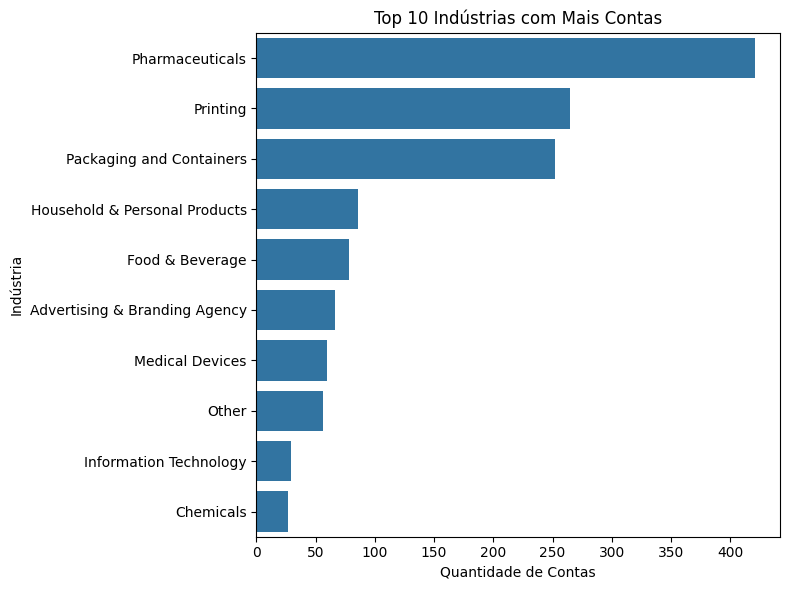

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

top_industries = industry_counts.head(10)  # Seleciona as 10 indústrias mais frequentes

plt.figure(figsize=(8, 6))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Indústrias com Mais Contas")
plt.xlabel("Quantidade de Contas")
plt.ylabel("Indústria")
plt.tight_layout()
plt.show()

In [174]:
df_country_industry = df_accounts.groupby(['account_country', 'account_industry'])['account_sfid'].count()
print(df_country_industry.head(10))

account_country  account_industry             
Algeria          Pharmaceuticals                  1
Angola           Printing                         1
Argentina        Food & Beverage                  1
                 Materials                        1
                 Packaging and Containers         1
Australia        Advertising & Branding Agency    1
                 Food & Beverage                  1
                 Packaging and Containers         1
                 Pharmaceuticals                  1
                 Printing                         3
Name: account_sfid, dtype: int64


## analyze df_support_cases

In [175]:
df_support_cases

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0fc118ce4e9fac11b53e80c208d35445851730c9e8c838...,None,59751,Contact_f02dfb7d,Other,Duplicate,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2023-11-22,2023-11-22
9996,6b384dc4f5960df1f75f1721aafd565fcf7dc5c2ded1f8...,ff2ebcf997b631d6a92bfb8ac3050777f0896100708740...,59745,Contact_fb1bda0d,Digital Platform,Closed,No Customer Response,Undefined,Undefined,Normal,Low,Other,Crash,Software,2023-11-22,2023-12-08
9997,41393bdd653bfa66124e8969a79a74808081a8c01815ab...,48a5c2ff83657d99d8affb23e6e78cb300a66e2e953b44...,59756,Contact_b0933c5a,GVW,Closed,Fixed,Undefined,Undefined,Normal,Medium,Other,User Access Issue,Licensing,2023-11-22,2023-11-28
9998,f89a8181d96ce0bc56d79beb8220846d4916727efa9259...,d9423ed8aad410675137fe06e9ba52034072eea5c3fc34...,59747,Contact_6cde7782,GVD,Closed,Cancelled,Module Affected: Application,Undefined,Normal,Medium,Other,Software Performance,Software,2023-11-22,2023-11-24


In [176]:
df_support_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_sfid          10000 non-null  object
 1   account_sfid       8407 non-null   object
 2   case_number        10000 non-null  int64 
 3   case_contact_name  10000 non-null  object
 4   case_product       10000 non-null  object
 5   case_status        10000 non-null  object
 6   case_resolution    10000 non-null  object
 7   case_details       10000 non-null  object
 8   case_closure       10000 non-null  object
 9   case_priority      10000 non-null  object
 10  case_severity      10000 non-null  object
 11  case_reason        10000 non-null  object
 12  case_type          10000 non-null  object
 13  case_category      10000 non-null  object
 14  case_created_date  10000 non-null  object
 15  case_closed_date   9058 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.2

In [177]:
df_support_cases.head()

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None


In [178]:
df_support_cases.isnull().sum() # deixar o campo chave em aberto eexplicar 

case_sfid               0
account_sfid         1593
case_number             0
case_contact_name       0
case_product            0
case_status             0
case_resolution         0
case_details            0
case_closure            0
case_priority           0
case_severity           0
case_reason             0
case_type               0
case_category           0
case_created_date       0
case_closed_date      942
dtype: int64

In [179]:
df_support_cases.describe()

,case_number
count,10000.000000
mean,64884.845700
std,2914.373454
min,59745.000000
25%,62388.750000
50%,64890.500000
75%,67406.250000
max,69911.000000


In [180]:
df_support_cases.duplicated().sum()

0

In [181]:
# Preenchendo os valores desconhecidos como Null ver comando que coloca null
df_support_cases['account_sfid'] = df_support_cases['account_sfid'].fillna("Unknown")

In [182]:
df_support_cases['case_created_date'] = pd.to_datetime(df_support_cases['case_created_date'])
print(df_support_cases.dtypes)

case_sfid                    object
account_sfid                 object
case_number                   int64
case_contact_name            object
case_product                 object
case_status                  object
case_resolution              object
case_details                 object
case_closure                 object
case_priority                object
case_severity                object
case_reason                  object
case_type                    object
case_category                object
case_created_date    datetime64[ns]
case_closed_date             object
dtype: object


In [183]:
print(df_support_cases['case_number'].value_counts().head(10))

case_number
69908    1
63235    1
63233    1
63201    1
63206    1
63221    1
63207    1
63227    1
63217    1
63219    1
Name: count, dtype: int64


In [184]:
print(df_support_cases['case_product'].value_counts().head(10))

case_product
GVD                   2850
Other                 2573
Verify                1028
Not a Support Case    1024
GVW                    825
Esko                   356
Verify Enterprise      231
GVD Enterprise         176
GVD Perpetual          156
Print Inspection       148
Name: count, dtype: int64


In [185]:
print(df_support_cases['case_status'].value_counts().head(10))

case_status
Closed                      7043
Duplicate                   2015
New                          795
Waiting On Customer           45
Working                       39
Sent_To_Dev                   35
Waiting for 3rd Party         10
Assigned                       9
Remote Session Scheduled       9
Name: count, dtype: int64


In [186]:
print(df_support_cases['case_resolution'].value_counts().head(10))

case_resolution
Undefined               4064
Done                    3304
Fixed                   1413
No Customer Response     768
Known Issue              168
Cancelled                150
Cannot Reproduce          79
Training Provided         53
Custom Profile             1
Name: count, dtype: int64


In [187]:
print(df_support_cases['case_type'].value_counts().head(10))

case_type
Undefined               3728
License Activation      2963
Software Question        720
Software Performance     708
User Access Issue        623
Inspection Results       430
License Issue            226
Crash                    195
Hardware Question         96
Bug                       94
Name: count, dtype: int64


In [188]:
print(df_support_cases['case_category'].value_counts().head(10))

case_category
Licensing                 3847
Undefined                 3635
Software                  2204
Hardware                   183
Server & Configuration      49
Order Services              48
Not a Support Case          34
Name: count, dtype: int64


## Part 2 Data Processing 

## Insights

## 1. Número de Casos por País
- Descobre em quais países o suporte é mais demandado. Isso ajuda o negócio a entender onde há maior necessidade de atendimento ou possíveis problemas recorrentes por região.

In [189]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    a.account_country,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
LEFT JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_country
ORDER BY total_cases DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_cases_percountry = pysqldf(query)

# Visualiza as primeiras linhas
print(df_cases_percountry.head())

  account_country  total_cases
0   United States         3383
1          Canada         1967
2           China          399
3           India          251
4  United Kingdom          239


## 2. Número de Casos por Indústria
-  Revela quais setores demandam mais suporte. Útil para priorizar times de suporte especializados ou desenvolvimento de soluções específicas para determinadas indústrias.

In [190]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    a.account_industry,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_industry
ORDER BY total_cases DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_cases_industry = pysqldf(query)

# Visualiza as primeiras linhas
print(df_cases_industry.head())

                account_industry  total_cases
0                Pharmaceuticals         2393
1         Information Technology         1849
2                       Printing         1154
3       Packaging and Containers         1072
4  Advertising & Branding Agency          475


## 3. Número de Casos por Conta (TOP 10)
-  Identifica as 10 contas mais ativas em suporte. Essas contas podem ser clientes importantes ou clientes com muitos problemas. Isso guia a equipe de suporte no planejamento de ações pró-ativas.

In [191]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    a.account_sfid,
    a.account_name,
    COUNT(s.case_sfid) AS total_cases
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
GROUP BY a.account_sfid, a.account_name
ORDER BY total_cases DESC
LIMIT 5
"""

# Executa a query e armazena o resultado em um DataFrame
df_cases_account = pysqldf(query)

# Visualiza as primeiras linhas
print(df_cases_account.head())

                                        account_sfid       account_name  \
0  87b5772b6964f23ef7db8085e8f91c41937979575f8afd...  Customer_900e52a5   
1  0e45934f296ca9a462fb43e3d47246ced1379555d4eb3e...  Customer_a8719d37   
2  a6b6a3deac72bfbd98608d35a5c4d165e05ff0a89debb2...  Customer_5eb51762   
3  1a179a8a319d12ad422050acbdc3866347a5e629d56090...  Customer_a8fc29fc   
4  e2494728998b67f23f0e57ef2441feb32e15911b3c9f13...  Customer_2b583155   

   total_cases  
0         1650  
1          226  
2          165  
3          107  
4           73  


## 4. Tempo Médio de Resolução por Conta
-  Mede em dias quanto tempo leva, em média, para resolver os casos de cada conta. Permite comparar:
- Contas com tempo de resolução alto, que podem estar insatisfeitas.
- Contas com tempo de resolução baixo, sinal de processos mais eficientes.

In [192]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    a.account_sfid,
    a.account_name,
    AVG(
       JULIANDAY(s.case_closed_date) - JULIANDAY(s.case_created_date)
    ) AS avg_resolution_days
FROM df_accounts AS a
JOIN df_support_cases AS s
    ON a.account_sfid = s.account_sfid
WHERE s.case_closed_date IS NOT NULL
GROUP BY a.account_sfid, a.account_name
ORDER BY avg_resolution_days DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_time_resolution = pysqldf(query)

# Visualiza as primeiras linhas
print(df_time_resolution.head())

                                        account_sfid       account_name  \
0  ebbd974534c2731cb6a3516e4512aa3e699e4b2aa9918e...  Customer_efbea522   
1  0ac1c94865505d38033b228dcc43c6be542f750b62f2cd...  Customer_d50e3196   
2  d1b05d35565572bd179161ebb9d1656c6c2e4019c93a82...  Customer_672604ad   
3  ec5c669689f18c7e893f7ffab740913cd9240679b147e5...  Customer_87ba4119   
4  11b9ee9da51b36bcdaa430768f681c47f767dcac7414b7...  Customer_2e9f4b77   

   avg_resolution_days  
0                161.0  
1                158.0  
2                149.0  
3                110.0  
4                 97.5  


## 5. Distribuição de Casos por Severidade
-  Permite saber qual o nível de gravidade predominante nos casos, ajudando a equipe de suporte a dimensionar esforços (e.g., se a maioria é de alta severidade, é preciso mais alocação de recursos).

In [193]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    s.case_severity,
    COUNT(s.case_sfid) AS total_cases
FROM df_support_cases AS s
GROUP BY s.case_severity
ORDER BY total_cases DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_severity_cases = pysqldf(query)

# Visualiza as primeiras linhas
print(df_severity_cases.head())

  case_severity  total_cases
0        Medium         4078
1           Low         3159
2     Undefined         2659
3          High           72
4        Urgent           32


## 6. Distribuição de Casos por Prioridade
- Similar à severidade, identifica quão urgente é a maior parte dos casos. Se muitos casos são “High Priority”, a empresa pode precisar rever processos de triagem.

In [194]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL para a distribuição por prioridade
query = """
SELECT
    s.case_priority,
    COUNT(s.case_sfid) AS total_cases
FROM df_support_cases AS s
GROUP BY s.case_priority
ORDER BY total_cases DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_priority_cases = pysqldf(query)

# Visualiza as primeiras linhas
print(df_priority_cases.head())

  case_priority  total_cases
0        Normal         9811
1        Urgent          152
2  not_priority           35
3          High            2


## 7. Resolution time per country
- 	•	Insight: Ajuda a entender variações regionais no tempo de resolução. Talvez haja barreiras de idioma, fuso horário ou outros fatores em certos países.

In [195]:
# Função auxiliar para executar queries SQL no pandasql
pysqldf = lambda q: sqldf(q, globals())

# Consulta SQL
query = """
SELECT
    a.account_country,
    AVG(JULIANDAY(s.case_closed_date) - JULIANDAY(s.case_created_date)) AS avg_resolution_days
FROM df_accounts a
JOIN df_support_cases s
    ON a.account_sfid = s.account_sfid
WHERE s.case_closed_date IS NOT NULL
GROUP BY a.account_country
ORDER BY avg_resolution_days DESC
"""

# Executa a query e armazena o resultado em um DataFrame
df_time_per_country = pysqldf(query)

# Visualiza as primeiras linhas
print(df_time_per_country.head())

  account_country  avg_resolution_days
0        Pakistan            39.000000
1       Lithuania            31.916667
2         Unknown            21.818182
3          Cyprus            13.666667
4         Algeria            13.000000


# Part 3 Data Visualization

## 1. Número de Casos por país.

# 2. Número de casos por país, pizza

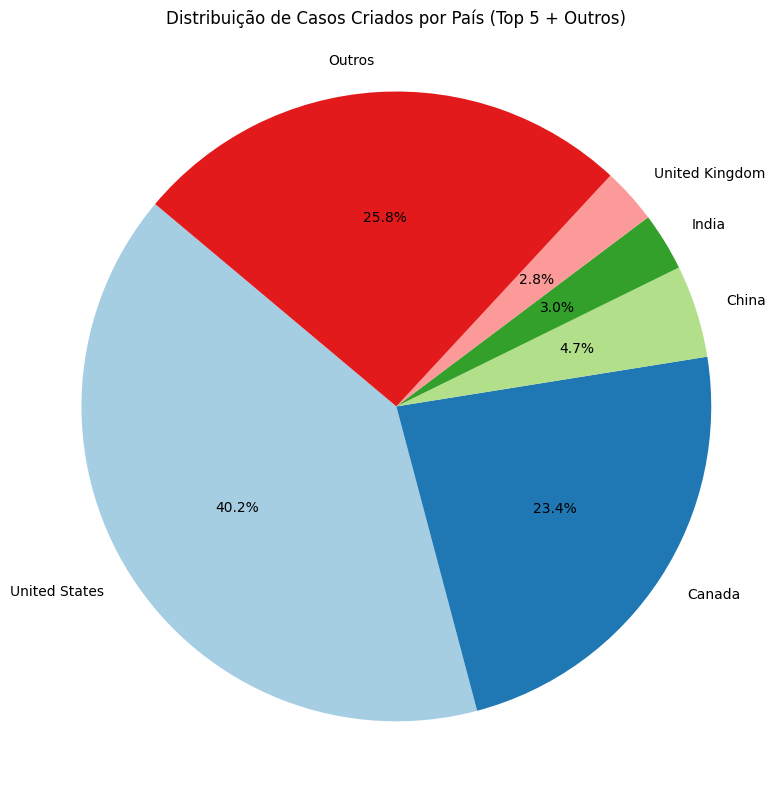

In [196]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupa os dados por país e conta o número de casos criados
df_cases_by_country = df_combined.groupby('account_country').size().reset_index(name='total_cases')

# Ordena os dados em ordem decrescente e pega os 5 primeiros países
df_top5_countries = df_cases_by_country.sort_values('total_cases', ascending=False).head(5)

# Soma os casos dos outros países e cria uma nova linha "Outros"
df_other_countries = df_cases_by_country[~df_cases_by_country['account_country'].isin(df_top5_countries['account_country'])]
df_other_countries_sum = df_other_countries['total_cases'].sum()

# Cria um DataFrame com a linha 'Outros'
df_outros = pd.DataFrame({'account_country': ['Outros'], 'total_cases': [df_other_countries_sum]})

# Junta os DataFrames com pd.concat
df_top5_countries = pd.concat([df_top5_countries, df_outros], ignore_index=True)

# Plote o gráfico de pizza para mostrar a distribuição de casos por país (Top 5 + Outros)
plt.figure(figsize=(8, 8))
plt.pie(df_top5_countries['total_cases'], 
        labels=df_top5_countries['account_country'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)

plt.title('Distribuição de Casos Criados por País (Top 5 + Outros)')
plt.axis('equal')  # Para deixar o gráfico circular
plt.tight_layout()
plt.show()

# 3. ANALISANDO A SEVERIDADE DOS CASOS NO TOP 3

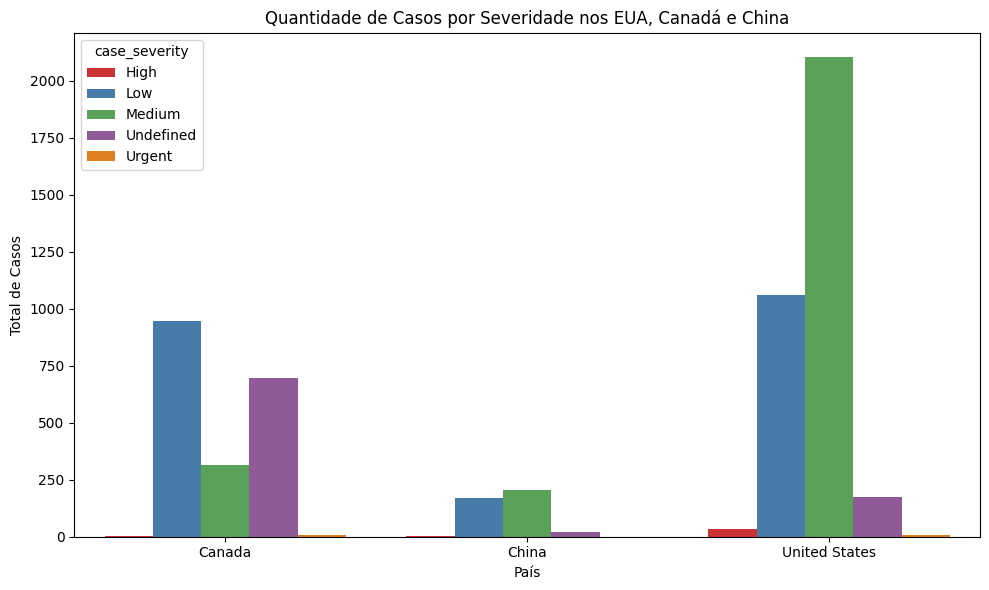

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir os datasets df_accounts e df_support_cases usando 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Filtra os dados para incluir apenas os países de interesse
df_filtered = df_combined[df_combined['account_country'].isin(['United States', 'Canada', 'China'])]

# Agrupa os dados por país e severidade para contar os casos
df_severity_by_country = df_filtered.groupby(['account_country', 'case_severity']).size().reset_index(name='total_cases')

# Plote o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_severity_by_country, 
    x='account_country', 
    y='total_cases', 
    hue='case_severity', 
    palette="Set1"
)

plt.title('Quantidade de Casos por Severidade nos EUA, Canadá e China')
plt.xlabel('País')
plt.ylabel('Total de Casos')
plt.tight_layout()
plt.show()

# 4. Analisando quais industrias estao relacionadas ao top 3 paises


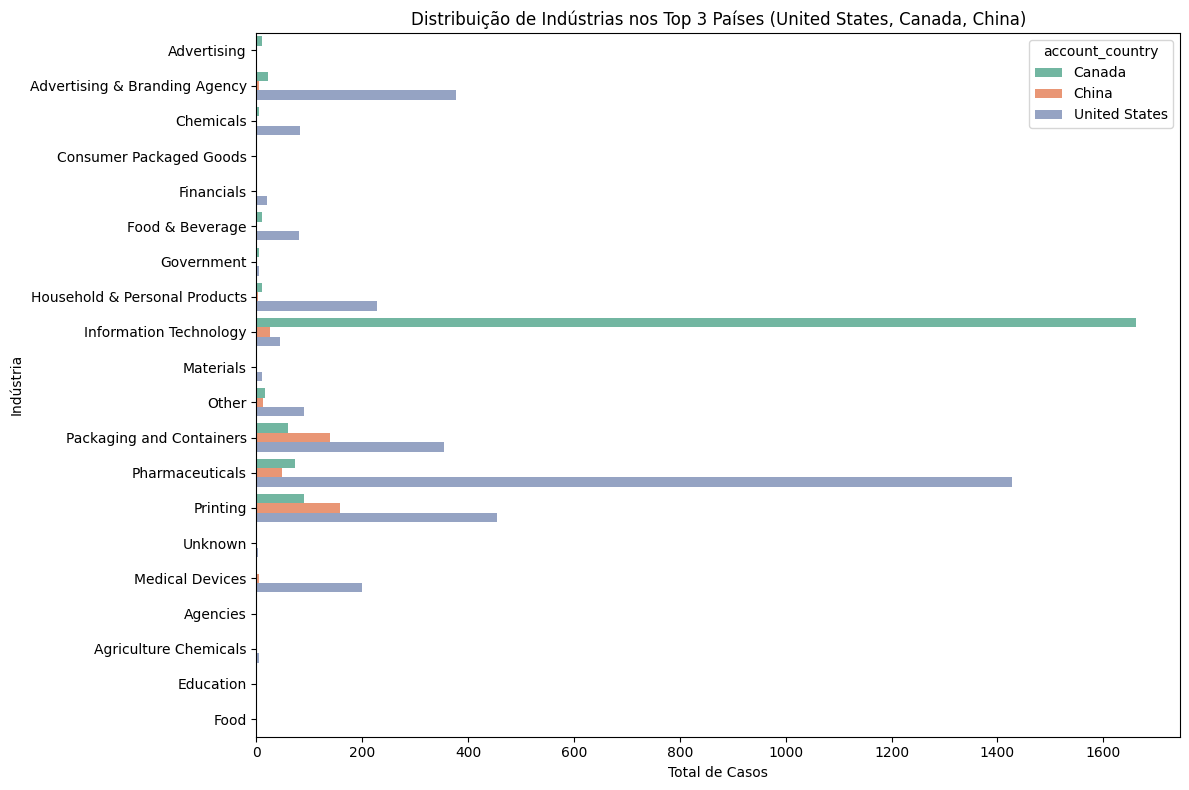

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os países de interesse: United States, Canada, China
df_filtered_countries = df_combined[df_combined['account_country'].isin(['United States', 'Canada', 'China'])]

# Agrupa os dados por país e indústria para contar os casos
df_industry_by_country = df_filtered_countries.groupby(['account_country', 'account_industry']).size().reset_index(name='total_cases')

# Plote o gráfico de barras para visualizar as indústrias predominantes nos países selecionados
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_industry_by_country, 
    x='total_cases', 
    y='account_industry', 
    hue='account_country', 
    palette='Set2'  # Cores distintas para os países
)

plt.title('Distribuição de Indústrias nos Top 3 Países (United States, Canada, China)')
plt.xlabel('Total de Casos')
plt.ylabel('Indústria')
plt.tight_layout()
plt.show()

## 5. Número de Casos por Indústria


/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/2635078314.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




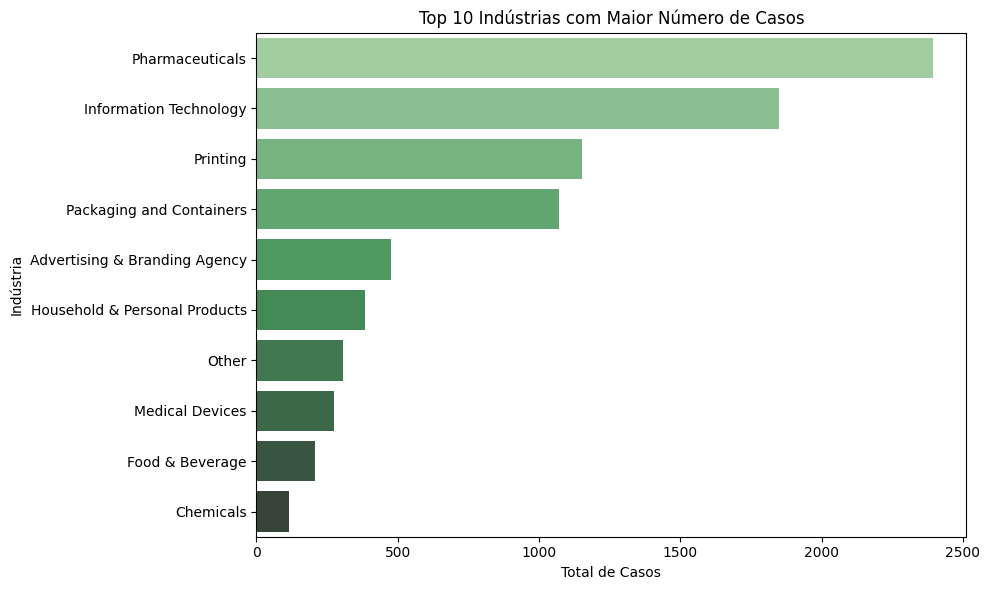

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame decrescentemente
df_cases_industry = df_cases_industry.sort_values("total_cases", ascending=False)

# Seleciona apenas as 10 indústrias com mais casos
df_top10_industries = df_cases_industry.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_industries, 
    x="total_cases", 
    y="account_industry",
    palette="Greens_d"
)

plt.title("Top 10 Indústrias com Maior Número de Casos")
plt.xlabel("Total de Casos")
plt.ylabel("Indústria")
plt.tight_layout()
plt.show()

# 6. Distribuição de Casos por País para as Top 3 Indústrias

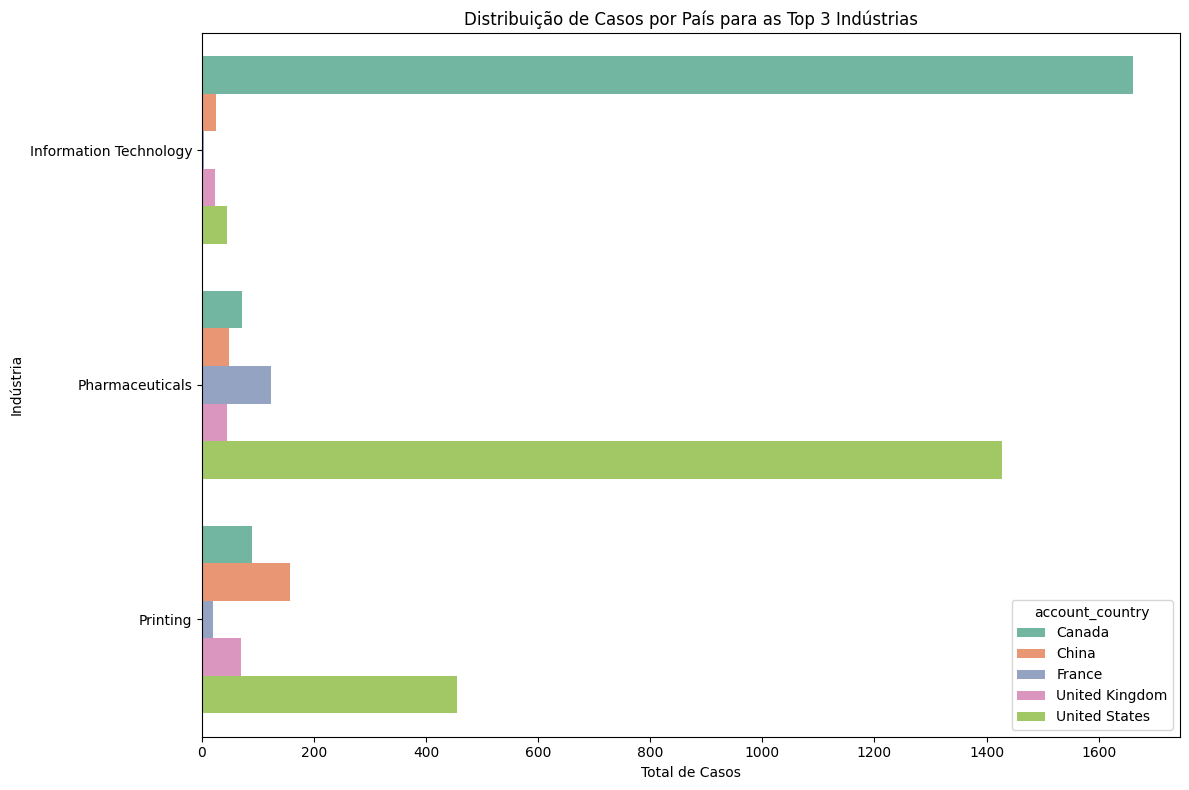

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame para encontrar as top 3 indústrias com mais casos
df_cases_industry = df_cases_industry.sort_values("total_cases", ascending=False)

# Seleciona as 3 indústrias com mais casos
df_top3_industries = df_cases_industry.head(3)

# Filtra os dados para essas indústrias
df_filtered_industries = df_combined[df_combined['account_industry'].isin(df_top3_industries['account_industry'])]

# Agrupa os dados por indústria e país para contar os casos
df_cases_by_industry_country = df_filtered_industries.groupby(['account_industry', 'account_country']).size().reset_index(name='total_cases')

# Seleciona os 5 países com maior número de casos nas indústrias selecionadas
top5_countries = df_cases_by_industry_country.groupby('account_country')['total_cases'].sum().nlargest(5).index
df_top5_cases = df_cases_by_industry_country[df_cases_by_industry_country['account_country'].isin(top5_countries)]

# Plote o gráfico de barras com as 5 indústrias mais afetadas por país
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top5_cases, 
    x='total_cases', 
    y='account_industry', 
    hue='account_country', 
    palette='Set2'  # Cores distintas para os países
)

plt.title("Distribuição de Casos por País para as Top 3 Indústrias")
plt.xlabel("Total de Casos")
plt.ylabel("Indústria")
plt.tight_layout()
plt.show()

# 7. Distribuição do Tipo de Chamado nos EUA, Canadá e China

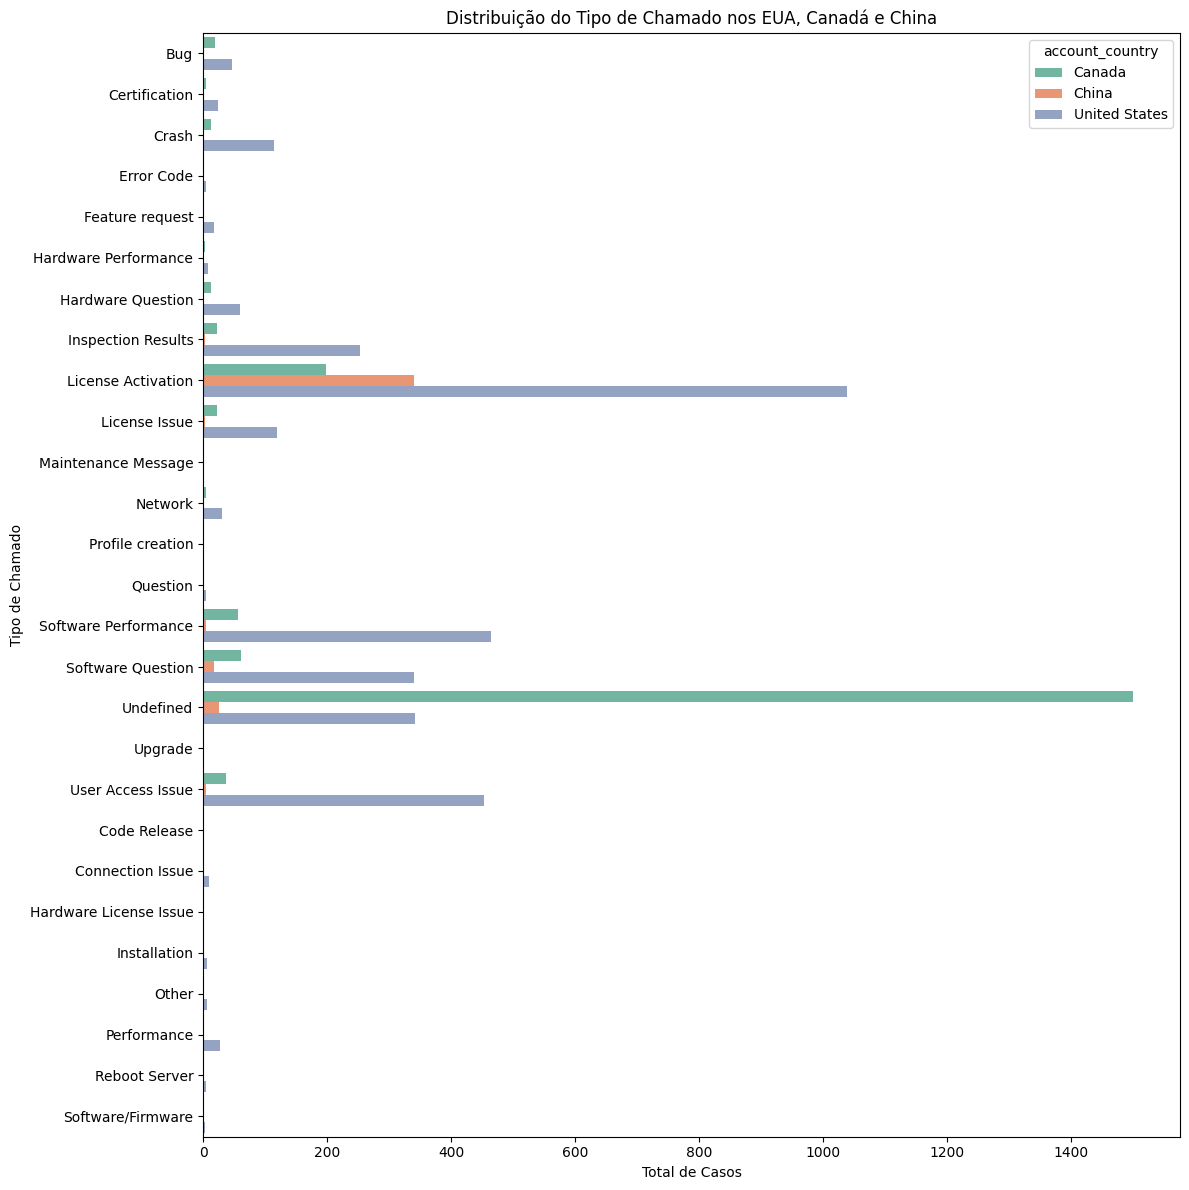

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os países de interesse: Estados Unidos, Canadá e China
df_filtered_countries = df_combined[df_combined['account_country'].isin(['United States', 'Canada', 'China'])]

# Agrupa os dados por tipo de chamado e país para contar os casos
df_case_type_by_country = df_filtered_countries.groupby(['account_country', 'case_type']).size().reset_index(name='total_cases')

# Plote o gráfico de barras para visualizar a distribuição do tipo de chamado por país
plt.figure(figsize=(12, 12))
sns.barplot(
    data=df_case_type_by_country, 
    x='total_cases', 
    y='case_type', 
    hue='account_country', 
    palette='Set2'  # Cores distintas para os países
)

plt.title('Distribuição do Tipo de Chamado nos EUA, Canadá e China')
plt.xlabel('Total de Casos')
plt.ylabel('Tipo de Chamado')
plt.tight_layout()
plt.show()

# 8. Tempo Médio de Resolução por Indústria

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o tempo de resolução para cada caso (em dias)
df_combined['resolution_time'] = (df_combined['case_closed_date'] - df_combined['case_created_date']).dt.days

# Agrupe os dados por indústria e calcule o tempo médio de resolução para cada uma
df_resolution_by_industry = df_combined.groupby('account_industry')['resolution_time'].mean().reset_index()

# Ordena os dados pelo tempo médio de resolução em ordem decrescente
df_resolution_by_industry = df_resolution_by_industry.sort_values('resolution_time', ascending=False)

# Plote o gráfico de barras para visualizar a indústria com maior tempo de resolução
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_resolution_by_industry, 
    x='resolution_time', 
    y='account_industry', 
    palette='coolwarm'
)

plt.title('Tempo Médio de Resolução por Indústria')
plt.xlabel('Tempo Médio de Resolução (Dias)')
plt.ylabel('Indústria')
plt.tight_layout()
plt.show()

TypeError: cannot subtract DatetimeArray from ndarray

# 9. Distribuição de Casos Graves por País

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/1226699698.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




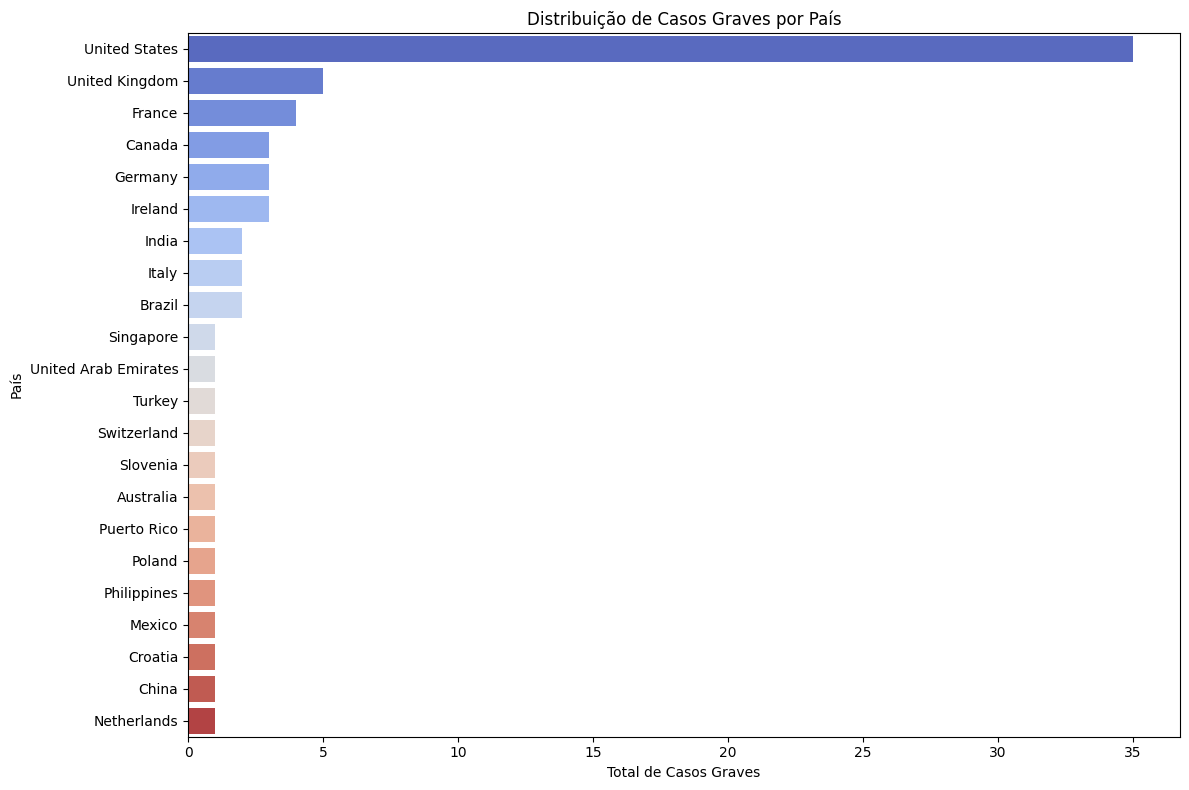

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os casos de alta severidade (exemplo: "Critical" ou "High")
df_high_severity = df_combined[df_combined['case_severity'].isin(['Critical', 'High'])]

# Agrupa os dados por país e severidade para contar os casos graves
df_severity_by_country = df_high_severity.groupby('account_country').size().reset_index(name='total_cases')

# Ordena os dados de forma decrescente para exibir os países com mais casos graves
df_severity_by_country = df_severity_by_country.sort_values('total_cases', ascending=False)

# Plote o gráfico de barras para visualizar os países com mais casos graves
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_country, 
    x='total_cases', 
    y='account_country', 
    palette='coolwarm'  # Cores distintas para os países
)

plt.title('Distribuição de Casos Graves por País')
plt.xlabel('Total de Casos Graves')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# 10. Distribuição de casos graves por indústria nos eua 

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/3930526773.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




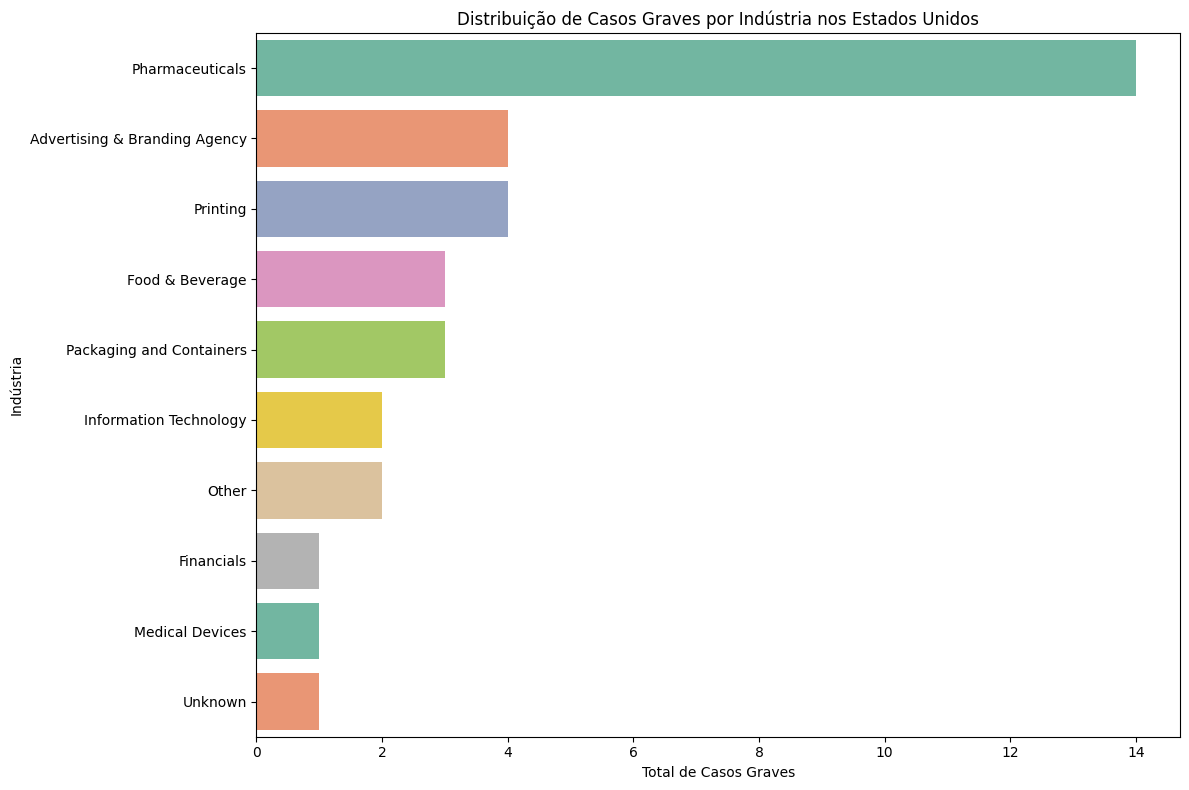

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os casos de alta severidade (exemplo: "Critical" ou "High") nos Estados Unidos
df_us_high_severity = df_combined[(df_combined['account_country'] == 'United States') & 
                                  (df_combined['case_severity'].isin(['Critical', 'High']))]

# Agrupa os dados por indústria para contar os casos graves nos Estados Unidos
df_severity_by_industry_us = df_us_high_severity.groupby('account_industry').size().reset_index(name='total_cases')

# Ordena os dados de forma decrescente para exibir as indústrias com mais casos graves
df_severity_by_industry_us = df_severity_by_industry_us.sort_values('total_cases', ascending=False)

# Plote o gráfico de barras para visualizar as indústrias com mais casos graves nos EUA
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_industry_us, 
    x='total_cases', 
    y='account_industry', 
    palette='Set2'  # Cores distintas para as indústrias
)

plt.title('Distribuição de Casos Graves por Indústria nos Estados Unidos')
plt.xlabel('Total de Casos Graves')
plt.ylabel('Indústria')
plt.tight_layout()
plt.show()

# 11. Tempo Médio de Resolução de Casos nos Estados Unidos por Ano de Criação das Contas

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir os datasets df_accounts e df_support_cases usando 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Filtra os dados para os casos dos Estados Unidos
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calcule o tempo de resolução para cada caso (em dias)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Extrai o ano de criação das contas
df_us_cases['year_created'] = df_us_cases['account_created_date'].dt.year

# Agrupa os dados por ano de criação das contas e calcula o tempo médio de resolução
df_resolution_per_year_us = df_us_cases.groupby('year_created')['resolution_time'].mean().reset_index()

# Plote o gráfico de linha para o tempo de resolução nos Estados Unidos ao longo dos anos de criação das contas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resolution_per_year_us, x='year_created', y='resolution_time', marker='o', color='b')

# Adiciona todos os anos no eixo X com intervalo de 1 em 1
plt.xticks(df_resolution_per_year_us['year_created'], rotation=45)

plt.title('Tempo Médio de Resolução de Casos nos Estados Unidos por Ano de Criação das Contas')
plt.xlabel('Ano de Criação das Contas')
plt.ylabel('Tempo Médio de Resolução (Dias)')
plt.tight_layout()
plt.show()

TypeError: cannot subtract DatetimeArray from ndarray

# 12.  Tendencia de tempo de resolução, média de tempo de resolução, máximo e mínimo de resolução

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/1874027245.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/1874027245.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



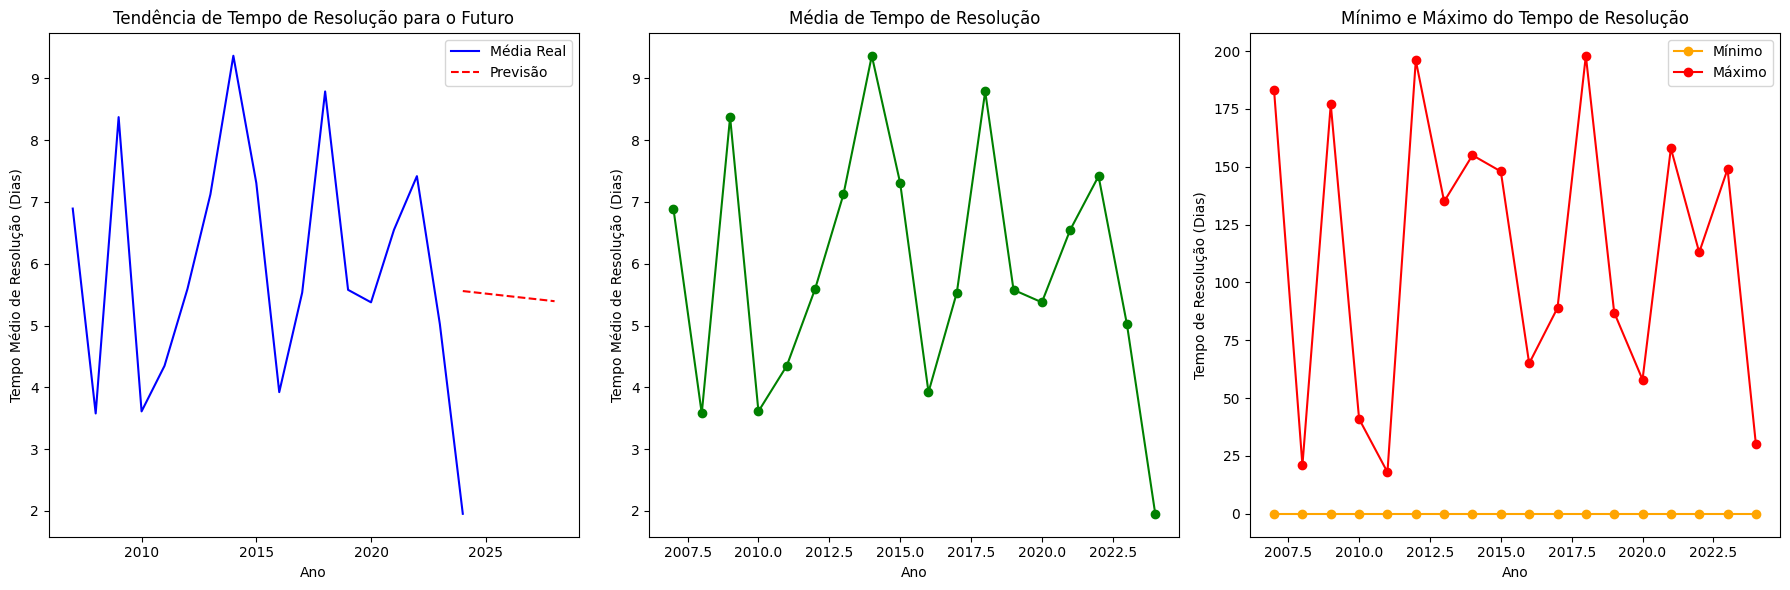

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Unir os datasets df_accounts e df_support_cases usando 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Filtra os dados para os casos dos Estados Unidos
df_us_cases = df_combined[df_combined['account_country'] == 'United States']

# Calcule o tempo de resolução para cada caso (em dias)
df_us_cases['resolution_time'] = (df_us_cases['case_closed_date'] - df_us_cases['case_created_date']).dt.days

# Extrai o ano de criação das contas
df_us_cases['year_created'] = df_us_cases['account_created_date'].dt.year

# Agrupa os dados por ano de criação das contas e calcula a média, mínimo e máximo de resolução
df_resolution_stats = df_us_cases.groupby('year_created')['resolution_time'].agg(['mean', 'min', 'max']).reset_index()

# Criando a previsão para o futuro (Regressão Linear)
X = df_resolution_stats['year_created'].values.reshape(-1, 1)
y = df_resolution_stats['mean'].values
model = LinearRegression().fit(X, y)
future_years = np.arange(df_resolution_stats['year_created'].max(), df_resolution_stats['year_created'].max() + 5).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Criando os subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Tendência do Tempo de Resolução para o Futuro (Predição)
axes[0].plot(df_resolution_stats['year_created'], df_resolution_stats['mean'], label='Média Real', color='b')
axes[0].plot(future_years, future_predictions, label='Previsão', linestyle='--', color='r')
axes[0].set_title('Tendência de Tempo de Resolução para o Futuro')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Tempo Médio de Resolução (Dias)')
axes[0].legend()

# Gráfico 2: Média do Tempo de Resolução
axes[1].plot(df_resolution_stats['year_created'], df_resolution_stats['mean'], marker='o', color='g')
axes[1].set_title('Média de Tempo de Resolução')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Tempo Médio de Resolução (Dias)')

# Gráfico 3: Mínimo e Máximo do Tempo de Resolução
axes[2].plot(df_resolution_stats['year_created'], df_resolution_stats['min'], marker='o', label='Mínimo', color='orange')
axes[2].plot(df_resolution_stats['year_created'], df_resolution_stats['max'], marker='o', label='Máximo', color='red')
axes[2].set_title('Mínimo e Máximo do Tempo de Resolução')
axes[2].set_xlabel('Ano')
axes[2].set_ylabel('Tempo de Resolução (Dias)')
axes[2].legend()

# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()

## 13. Número de Casos por Conta (TOP 5)

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/1657111750.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




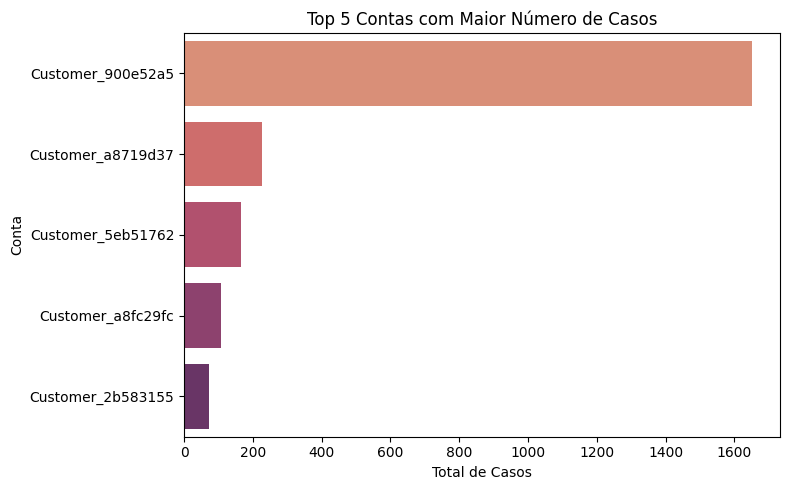

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garante a ordenação decrescente
df_cases_account = df_cases_account.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_cases_account, 
    x="total_cases", 
    y="account_name", 
    palette="flare"
)

plt.title("Top 5 Contas com Maior Número de Casos")
plt.xlabel("Total de Casos")
plt.ylabel("Conta")
plt.tight_layout()
plt.show()

	1.	Filtragem da Conta: A conta Customer_900e52a5 é filtrada do DataFrame combinado, onde estão as informações dos casos e das contas.
	2.	Exibição de Informações Básicas:
	•	Total de Casos: A quantidade de casos dessa conta.
	•	País e Indústria: Informações relacionadas à conta para entender o contexto.
	•	Ano de Criação: O ano em que a conta foi criada, o que pode influenciar a quantidade de casos.
	3.	Detalhamento dos Casos:
	•	Status, Prioridade, Severidade, Tipo de Caso: Exibe essas informações para investigar se há algum padrão relacionado ao número de casos dessa conta.
	4.	Tempo de Resolução: Calcula e exibe o tempo médio de resolução de casos para essa conta.

In [98]:
# Filtra os casos da conta Customer_900e52a5
df_customer_900e52a5 = df_combined[df_combined['account_name'] == 'Customer_900e52a5']

# Exibe as primeiras informações sobre os casos dessa conta
print("Informações sobre a conta Customer_900e52a5:")
print(f"Total de Casos: {df_customer_900e52a5.shape[0]}")
print(f"País: {df_customer_900e52a5['account_country'].iloc[0]}")
print(f"Indústria: {df_customer_900e52a5['account_industry'].iloc[0]}")
print(f"Ano de Criação: {df_customer_900e52a5['account_created_date'].iloc[0]}")

# Exibe os detalhes dos casos dessa conta
print("\nDetalhes dos Casos:")
print(df_customer_900e52a5[['case_sfid', 'case_status', 'case_priority', 'case_severity', 'case_type', 'case_category', 'case_created_date', 'case_closed_date']].head())

# Exibe estatísticas sobre os tempos de resolução dessa conta
df_customer_900e52a5['resolution_time'] = (df_customer_900e52a5['case_closed_date'] - df_customer_900e52a5['case_created_date']).dt.days
print(f"\nTempo médio de resolução para essa conta: {df_customer_900e52a5['resolution_time'].mean()} dias")

Informações sobre a conta Customer_900e52a5:
Total de Casos: 1650
País: Canada
Indústria: Information Technology
Ano de Criação: 2015-10-06 13:16:56

Detalhes dos Casos:
                                            case_sfid          case_status  \
23  7ac20ac15acb77535ba18a7b2c293e840c268ba9fce4fe...            Duplicate   
24  204aac3b7619c5206b906e50fce23b3b6f8cbf47e0bb01...               Closed   
38  dec143ba96a16657a782f79092d9f7f3ccc52c4d290c09...  Waiting On Customer   
40  4ee06912b582a91627a3c08d4a47b69b885a0179d02efe...               Closed   
44  5e3b8eaf4f076f8ceb703c92d7bc10fab58909b7c8d4c8...               Closed   

   case_priority case_severity          case_type case_category  \
23        Normal     Undefined          Undefined     Undefined   
24        Normal           Low          Undefined     Undefined   
38        Normal        Medium  User Access Issue     Licensing   
40        Normal           Low          Undefined     Undefined   
44        Normal          

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/3622648596.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 14. Distribuição de contas por país

In [113]:
import plotly.express as px 

df_map = df_accounts.groupby('account_country', as_index=False)['account_sfid'].count()
df_map.columns = ['country', 'accounts_count']

fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="accounts_count",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Distribuição de Contas por País"
)
fig.show()

# 15. Tempo Médio de Resolução por Conta # REVER SE DEIXO OU NÃO



/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/2912681052.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




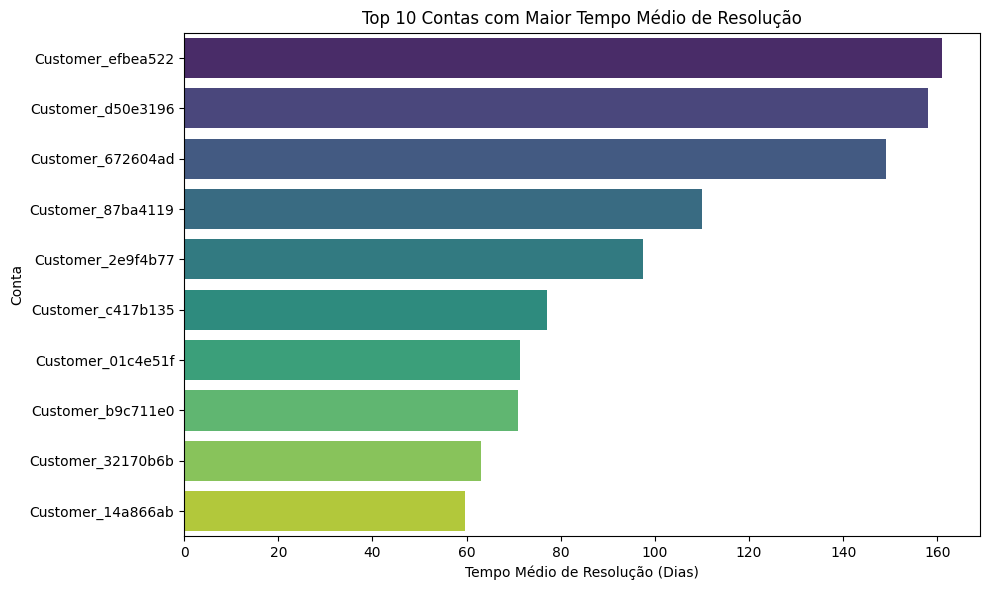

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame do maior para o menor tempo médio de resolução
df_time_resolution = df_time_resolution.sort_values("avg_resolution_days", ascending=False)

# Seleciona apenas as 10 contas com maior tempo médio de resolução
df_top10_time_resolution = df_time_resolution.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_time_resolution, 
    x="avg_resolution_days", 
    y="account_name", 
    palette="viridis"
)

plt.title("Top 10 Contas com Maior Tempo Médio de Resolução")
plt.xlabel("Tempo Médio de Resolução (Dias)")
plt.ylabel("Conta")
plt.tight_layout()
plt.show()

## 16. Distribuição de Casos por Severidade

In [70]:
print(df_severity_cases.columns)

Index(['case_priority', 'total_cases'], dtype='object')


/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/1809017518.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




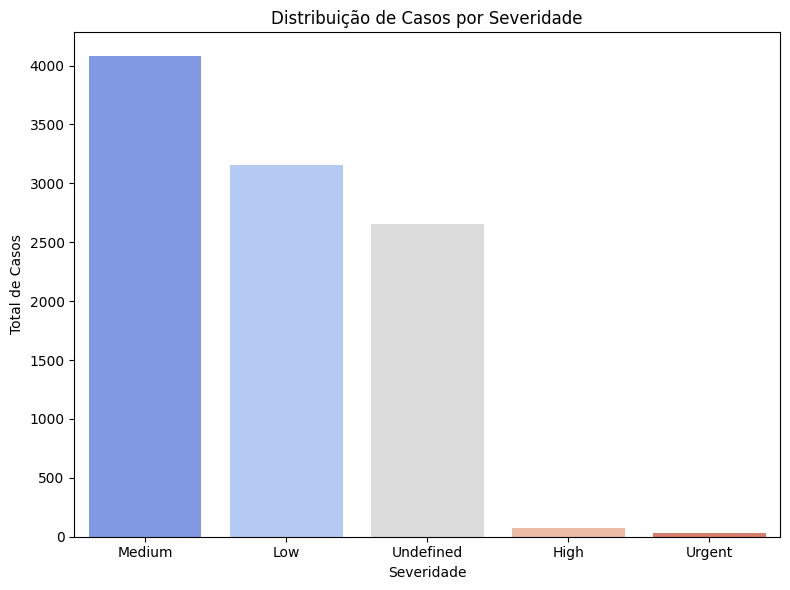

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena os casos por severidade
df_severity_cases = df_severity_cases.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_severity_cases, 
    x="case_severity", 
    y="total_cases",
    palette="coolwarm"
)

plt.title("Distribuição de Casos por Severidade")
plt.xlabel("Severidade")
plt.ylabel("Total de Casos")
plt.tight_layout()
plt.show()

## 17. Distribuição de Casos por Prioridade

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/240492026.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




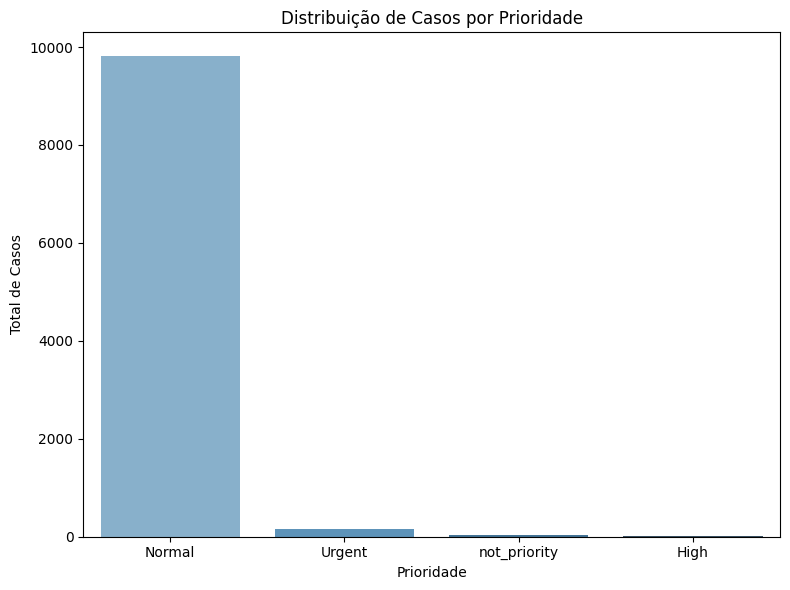

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame
df_priority_cases = df_priority_cases.sort_values("total_cases", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_priority_cases, 
    x="case_priority", 
    y="total_cases", 
    palette="Blues_d"
)

plt.title("Distribuição de Casos por Prioridade")
plt.xlabel("Prioridade")
plt.ylabel("Total de Casos")
plt.tight_layout()
plt.show()

##  18. Resolution time per country

/var/folders/86/t0s56lw963l8hq8z4bszh1j40000gn/T/ipykernel_889/2140100260.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




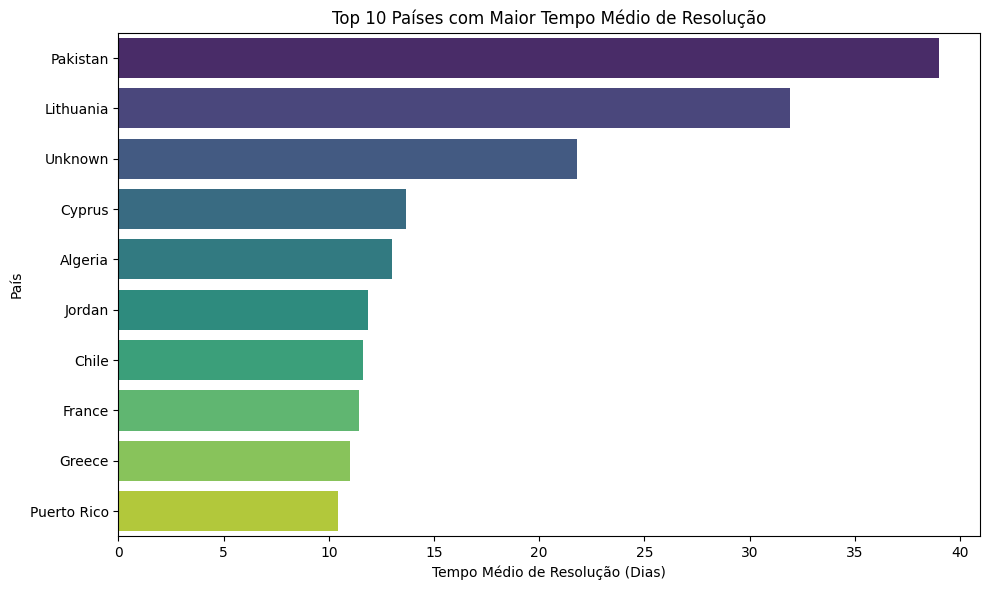

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena o DataFrame pelo tempo médio de resolução
df_time_per_country = df_time_per_country.sort_values("avg_resolution_days", ascending=False)

# Garante que estamos limitando a visualização aos top 10 países, se necessário
df_top10_time_country = df_time_per_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10_time_country, 
    x="avg_resolution_days", 
    y="account_country", 
    palette="viridis"
)

plt.title("Top 10 Países com Maior Tempo Médio de Resolução")
plt.xlabel("Tempo Médio de Resolução (Dias)")
plt.ylabel("País")
plt.tight_layout()
plt.show()

# 19. Distribuição de Casos por Severidade nos Países com Maior Tempo de Resolução(pakistan e lithuania)

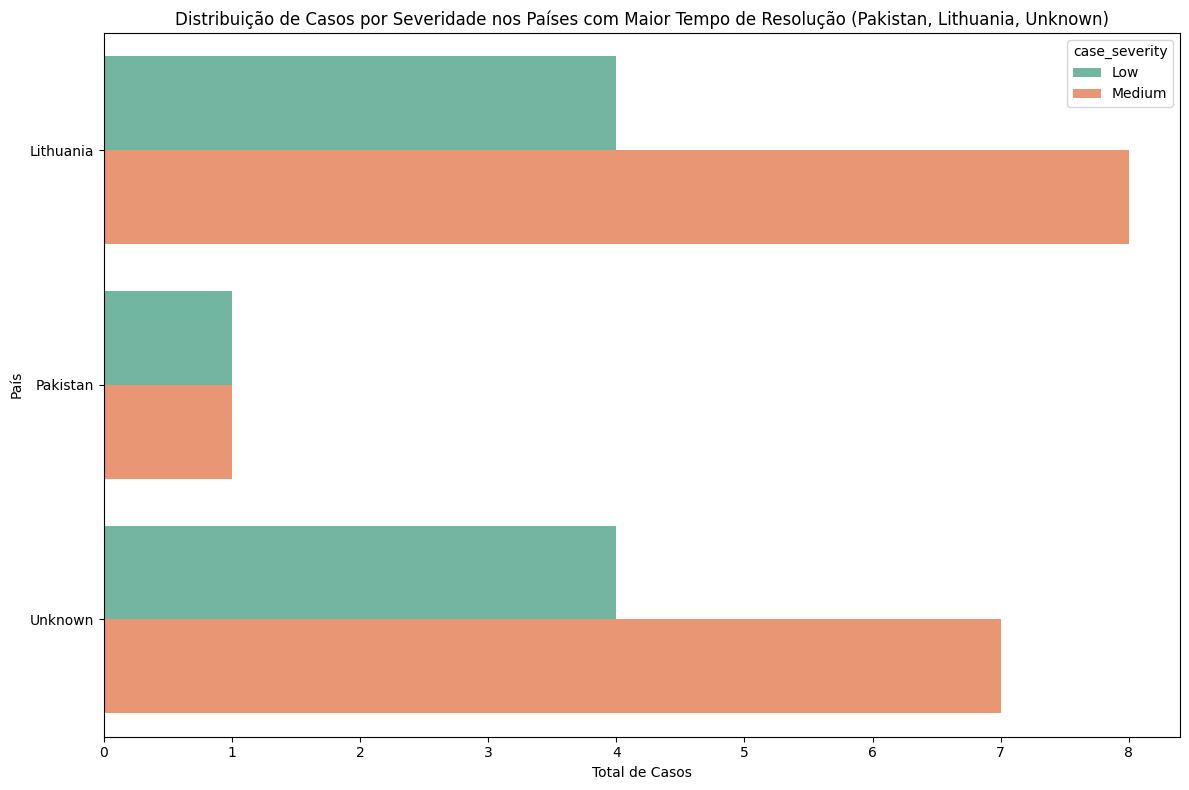

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra os dados para os países com maior tempo médio de resolução
df_filtered_countries = df_combined[df_combined['account_country'].isin(['Pakistan', 'Lithuania', 'Unknown'])]

# Agrupa os dados por país e severidade para contar os casos
df_severity_by_country = df_filtered_countries.groupby(['account_country', 'case_severity']).size().reset_index(name='total_cases')

# Plote o gráfico de barras para visualizar a distribuição de severidade
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_severity_by_country, 
    x='total_cases', 
    y='account_country', 
    hue='case_severity', 
    palette='Set2'  # Cores distintas para as severidades
)

plt.title("Distribuição de Casos por Severidade nos Países com Maior Tempo de Resolução (Pakistan, Lithuania, Unknown)")
plt.xlabel("Total de Casos")
plt.ylabel("País")
plt.tight_layout()
plt.show()

## 20. Evolução de contas criadas por mês e ano.


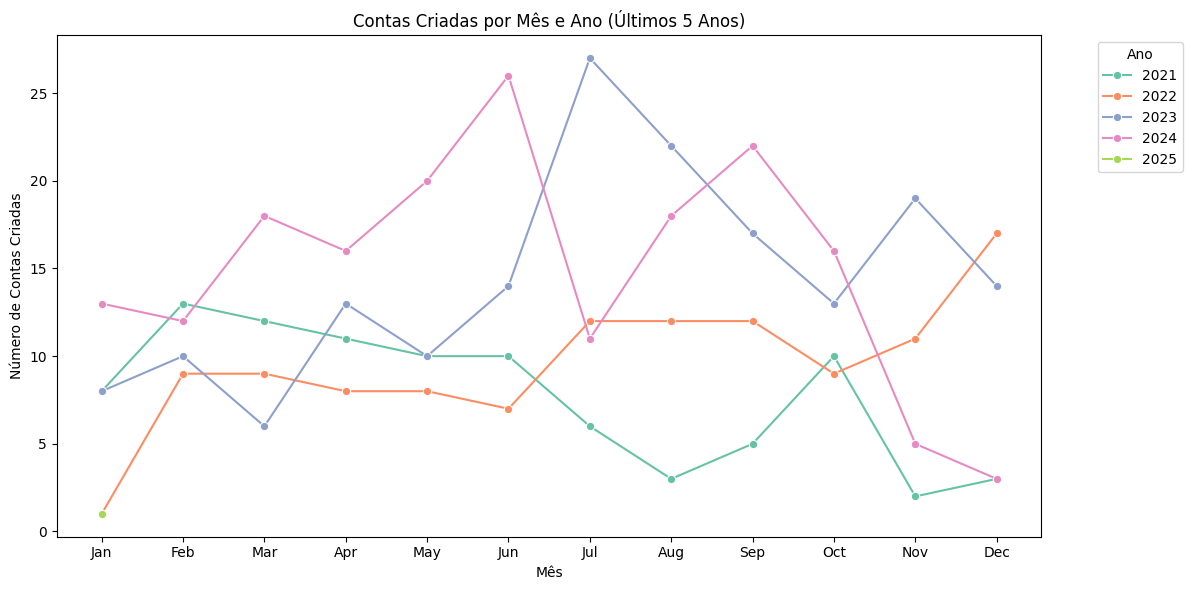

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assegure-se de que a coluna 'account_created_date' está no formato datetime
df_accounts['account_created_date'] = pd.to_datetime(df_accounts['account_created_date'])

# Crie novas colunas para 'ano' e 'mês'
df_accounts['year_created'] = df_accounts['account_created_date'].dt.year
df_accounts['month_created'] = df_accounts['account_created_date'].dt.month

# Filtra os últimos 5 anos
recent_years = df_accounts['year_created'].max()  # Último ano presente nos dados
df_accounts_filtered = df_accounts[df_accounts['year_created'] >= recent_years - 4]

# Contagem de contas por mês e ano
df_month_year = df_accounts_filtered.groupby(['year_created', 'month_created']).size().reset_index(name='total_accounts')

# Plote o gráfico de linhas com cores distintas para cada ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month_year, x='month_created', y='total_accounts', hue='year_created', palette='Set2', marker='o')

plt.title('Contas Criadas por Mês e Ano (Últimos 5 Anos)')
plt.xlabel('Mês')
plt.ylabel('Número de Contas Criadas')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 21. Tempo Médio de Resolução de Casos por Ano de Criação da Conta

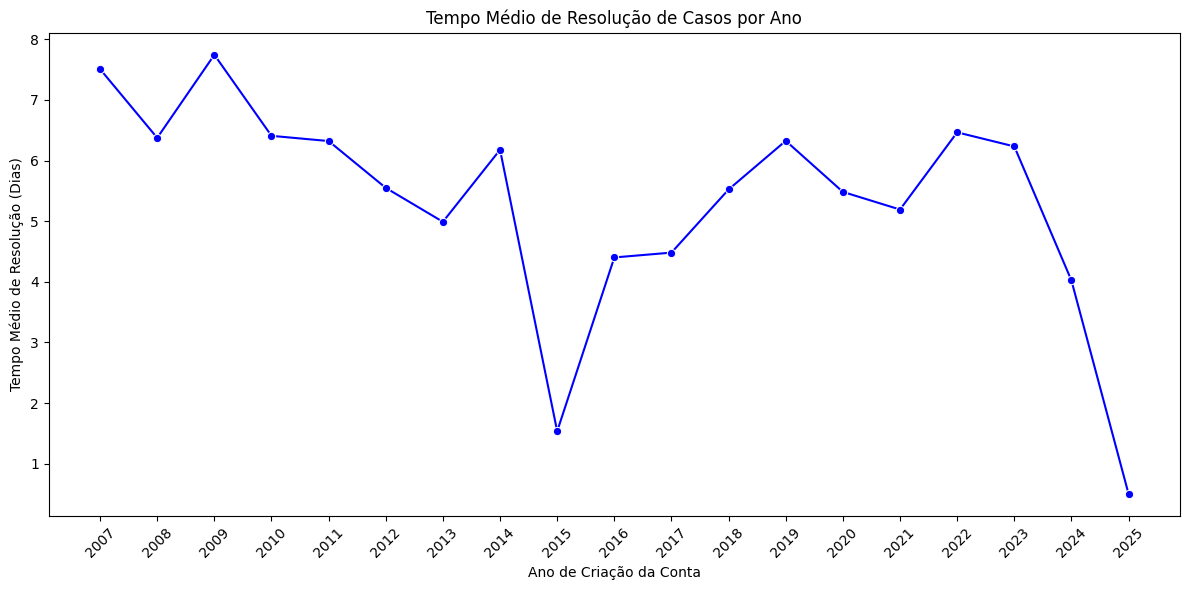

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assegure-se de que as colunas 'case_created_date' e 'case_closed_date' estão no formato datetime
df_support_cases['case_created_date'] = pd.to_datetime(df_support_cases['case_created_date'])
df_support_cases['case_closed_date'] = pd.to_datetime(df_support_cases['case_closed_date'])

# Unir os datasets df_accounts e df_support_cases usando 'account_sfid'
df_combined = pd.merge(df_support_cases, df_accounts, on='account_sfid', how='inner')

# Crie uma nova coluna para o ano de criação da conta
df_combined['year_created'] = df_combined['account_created_date'].dt.year

# Calcule o tempo de resolução para cada caso (em dias)
df_combined['resolution_time'] = (df_combined['case_closed_date'] - df_combined['case_created_date']).dt.days

# Calcule o tempo médio de resolução por ano de criação da conta
df_resolution_per_year = df_combined.groupby('year_created')['resolution_time'].mean().reset_index()

# Ordena os dados para garantir que os anos sejam mostrados em ordem crescente
df_resolution_per_year = df_resolution_per_year.sort_values('year_created')

# Plote o gráfico de linhas para a tendência do tempo de resolução por ano de criação da conta
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resolution_per_year, x='year_created', y='resolution_time', marker='o', color='b')

# Personalize os rótulos do eixo X para garantir que todos os anos apareçam
plt.title('Tempo Médio de Resolução de Casos por Ano')
plt.xlabel('Ano de Criação da Conta')
plt.ylabel('Tempo Médio de Resolução (Dias)')

# Adiciona todos os anos no eixo X
plt.xticks(df_resolution_per_year['year_created'], rotation=45)

plt.tight_layout()
plt.show()

# 22. Distribuição de Casos por Tipo de Chamado e Severidade (Top 10 Tipos)

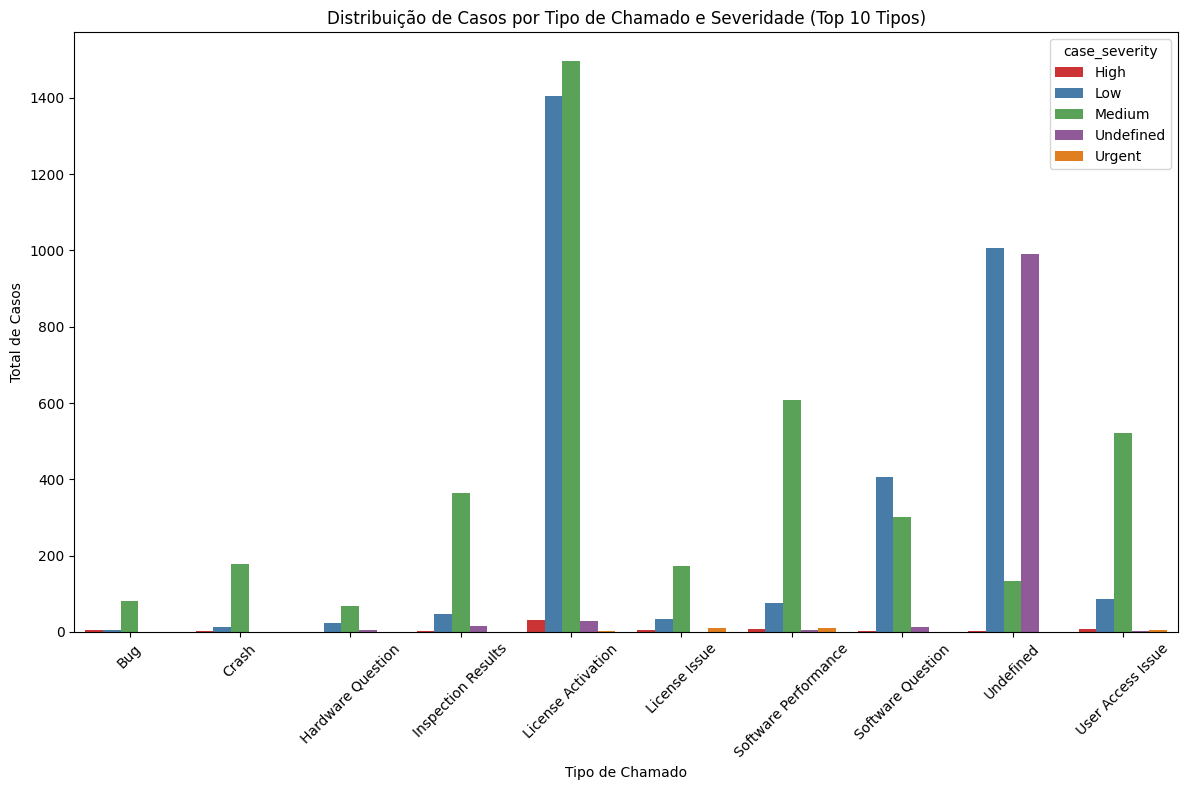

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados por tipo de chamado e severidade para contar o número de casos
df_case_type_severity = df_combined.groupby(['case_type', 'case_severity']).size().reset_index(name='total_cases')

# Seleciona os 10 tipos de chamados mais frequentes
top_10_case_types = df_case_type_severity.groupby('case_type')['total_cases'].sum().nlargest(10).index
df_top_10_case_type_severity = df_case_type_severity[df_case_type_severity['case_type'].isin(top_10_case_types)]

# Plote o gráfico de barras para visualizar a relação entre tipo de chamado e severidade, limitado aos top 10 tipos de chamados
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_10_case_type_severity, 
    x='case_type', 
    y='total_cases', 
    hue='case_severity', 
    palette='Set1'  # Cores distintas para cada severidade
)

plt.title('Distribuição de Casos por Tipo de Chamado e Severidade (Top 10 Tipos)')
plt.xlabel('Tipo de Chamado')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45)  # Para facilitar a leitura dos rótulos
plt.tight_layout()
plt.show()


# 23. Distribuição de Casos por Tipo de Chamado e Severidade (Top 3 Tipos)

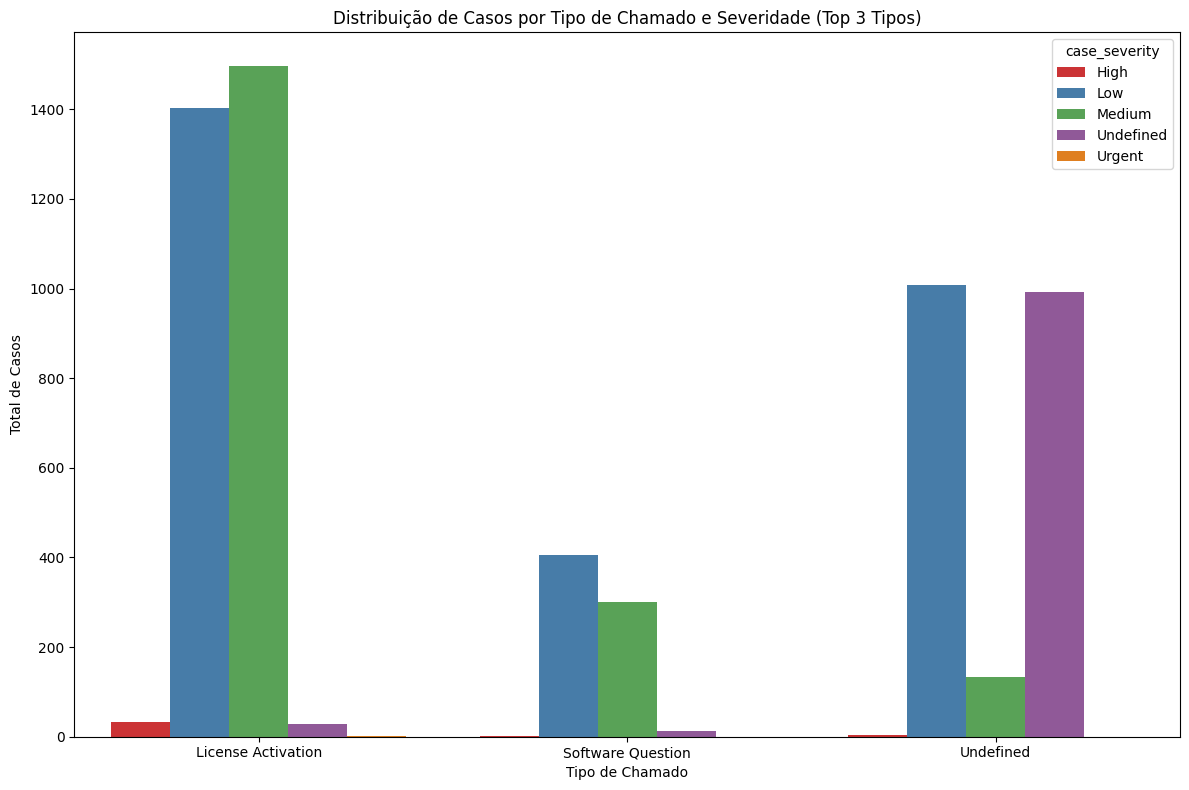

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa os dados por tipo de chamado e severidade para contar o número de casos
df_case_type_severity = df_combined.groupby(['case_type', 'case_severity']).size().reset_index(name='total_cases')

# Seleciona os 3 tipos de chamados mais frequentes
top_3_case_types = df_case_type_severity.groupby('case_type')['total_cases'].sum().nlargest(3).index
df_top_3_case_type_severity = df_case_type_severity[df_case_type_severity['case_type'].isin(top_3_case_types)]

# Plote o gráfico de barras para visualizar a relação entre tipo de chamado e severidade, limitado aos top 3 tipos de chamados
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_3_case_type_severity, 
    x='case_type', 
    y='total_cases', 
    hue='case_severity', 
    palette='Set1'  # Cores distintas para cada severidade
)

plt.title('Distribuição de Casos por Tipo de Chamado e Severidade (Top 3 Tipos)')
plt.xlabel('Tipo de Chamado')
plt.ylabel('Total de Casos')  # Para facilitar a leitura dos rótulos
plt.tight_layout()
plt.show()

# Part 4: Business Insights
### Based on your findings, answer the following questions:
- 1. What are the key insights you derived from the data and visualizations?
- 2. Propose two actionable recommendations that the business could take based on these insights.